In [1]:
import pandas as pd
# import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib_venn as venn
from datetime import date
from IPython.display import Image
from IPython.core.display import HTML 

In [2]:
#--- Important to install required libraries ---#

# voila - 0.5.5

# import nbconvert
# print(nbconvert.__version__)
# import voila
# print(voila.__version__)

## Asset Management System

In [3]:
# Image(filename='Downloads/schemabms.png')

In [4]:
def calculate_age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

customers = pd.read_excel("Downloads/customers.xlsx")
customers['age'] = customers['DATEOFBIRTH'].apply(calculate_age)


# customers

In [5]:
accounts = pd.read_excel("Downloads/accounts.xlsx")


# accounts

In [6]:
transactions = pd.read_excel("Downloads/transactions.xlsx")


# transactions

In [7]:
loans = pd.read_excel("Downloads/loans.xlsx")


# loans

In [8]:
investment_accounts = pd.read_excel("Downloads/investment_accounts.xlsx")
investment_accounts["investment_accounttype"] = investment_accounts["ACCOUNTTYPE"]


# investment_accounts

In [9]:
mutual_funds = pd.read_excel("Downloads/mutual_funds.xlsx")
mutual_funds["mf_investment_end_date"] = pd.Timestamp.now()
mutual_funds['mf_investment_start_date'] = pd.to_datetime(mutual_funds['INVESTMENTDATE'])
mutual_funds['mf_investment_end_date'] = pd.to_datetime(mutual_funds['mf_investment_end_date'])
mutual_funds['mf_investment_days'] = mutual_funds['mf_investment_end_date'] - mutual_funds['mf_investment_start_date']
mutual_funds['mf_tenure'] = mutual_funds['mf_investment_days'] / np.timedelta64(1, 'Y')
mutual_funds['mf_investment_days'] = mutual_funds['mf_investment_days'].dt.days


# mutual_funds

In [10]:
fixed_deposits = pd.read_excel("Downloads/fixed_deposits.xlsx")
fixed_deposits["fd_investment_end_date"] = pd.Timestamp.now()
fixed_deposits['fd_investment_start_date'] = pd.to_datetime(fixed_deposits['MATURITYDATE'])
fixed_deposits['fd_investment_end_date'] = pd.to_datetime(fixed_deposits['fd_investment_end_date'])
fixed_deposits['fd_investment_days'] = fixed_deposits['fd_investment_end_date'] - fixed_deposits['fd_investment_start_date']
fixed_deposits['fd_tenure'] = fixed_deposits['fd_investment_days'] / np.timedelta64(1, 'Y')
fixed_deposits['fd_investment_days'] = fixed_deposits['fd_investment_days'].dt.days


# fixed_deposits

In [11]:
stocks = pd.read_excel("Downloads/stocks.xlsx")
stocks["stock_investment_end_date"] = pd.Timestamp.now()
stocks['stock_investment_start_date'] = pd.to_datetime(stocks['PURCHASEDATE'])
stocks['stock_investment_end_date'] = pd.to_datetime(stocks['stock_investment_end_date'])
stocks['stock_investment_days'] = stocks['stock_investment_end_date'] - stocks['stock_investment_start_date']
stocks['stock_tenure'] = stocks['stock_investment_days'] / np.timedelta64(1, 'Y')
stocks['stock_investment_days'] = stocks['stock_investment_days'].dt.days


# stocks

In [12]:
## Base data calculation starts

In [13]:
customers_accounts = pd.merge(customers, accounts, how ="inner")
# for outer join use below code pd.merge(customers, accounts, how ="outer",indicator="customers_accounts")
# customers_accounts['customer_have_account'] = customers_accounts['customers_accounts'].apply(lambda x: 'Yes' if x == 'both' else 'No')


# customers_accounts

In [14]:
# total_customers_having_accounts = customers_accounts['CUSTOMERID'].nunique()
# print("Total Customers",total_customers_having_accounts)

# total_customers_having_investment_accounts = investment_accounts['CUSTOMERID'].nunique()
# print("Total Customers with Investments Account",total_customers_having_investment_accounts)

# summary_of_customers_having_investment_accounts = investment_accounts.groupby("ACCOUNTTYPE")["CUSTOMERID"].nunique()
# print("Customers with Investments Account",summary_of_customers_having_investment_accounts)

In [15]:
## Customers and Investments

In [16]:
customers_accounts_transactions = pd.merge(customers_accounts, transactions, how ="inner")
# for outer join use below code pd.merge(customers_accounts, transactions, how ="outer",indicator="customers_accounts_transactions")
# customers_accounts_transactions['customer_have_account_and_transaction'] = customers_accounts_transactions['customers_accounts_transactions'].apply(lambda x: 'Yes' if x == 'both' else 'No')


# customers_accounts_transactions

In [17]:
customers_with_transactions = customers_accounts_transactions['CUSTOMERID'].nunique()


# print("customers_with_transactions - ",customers_with_transactions)

In [18]:
customers_loans = pd.merge(customers, loans, how ="inner")
# for outer join use below code pd.merge(customers, loans, how ="outer",indicator="customers_loans")
# customers_loans['customer_have_loan'] = customers_loans['customers_loans'].apply(lambda x: 'Yes' if x == 'both' else 'No')


# customers_loans

In [19]:
customers_with_loan = customers_loans['CUSTOMERID'].nunique()


# print("customers_with_loan - ",customers_with_loan )

In [20]:
customers_account_balance = customers_accounts.groupby(by=['CUSTOMERID']).agg({'ACCOUNTBALANCE': 'sum'}).rename(columns={'ACCOUNTBALANCE': 'cust_account_balance'})


# print("customers_account_balance")
# customers_account_balance

In [21]:
customers_accounts = pd.merge(customers_accounts, customers_account_balance, how ="inner", on = "CUSTOMERID")


# print("customers_accounts")
# customers_accounts

In [22]:
customers_investment_accounts = pd.merge(customers_accounts, investment_accounts, how ="inner", on = "CUSTOMERID")
# for outer join use below code pd.merge(customers, investment_accounts, how ="outer",indicator="customers_investment_accounts")
# customers_investment_accounts['customer_have_investment_account'] = customers_investment_accounts['customers_investment_accounts'].apply(lambda x: 'Yes' if x == 'both' else 'No')


# print("customers_investment_accounts")
# customers_investment_accounts

In [23]:
customers_with_investment_account = customers_investment_accounts['CUSTOMERID'].nunique()


# print("customers_with_investment_account",customers_with_investment_account)

In [24]:
customers_investment_accounts_in_MF = customers_investment_accounts[customers_investment_accounts["ACCOUNTTYPE_y"]== "Mutual Funds"]
customers_investment_accounts_in_MF = pd.merge(customers_investment_accounts_in_MF, mutual_funds, how ="inner", on = "INVESTMENTACCOUNTID")


# print("customers_investment_accounts_in_MF")
# customers_investment_accounts_in_MF

In [25]:
MF_customers_investment_count = customers_investment_accounts_in_MF.groupby('FUNDNAME')['CUSTOMERID'].nunique().sort_values(ascending = False)


# print("Mutual Fund Investments Summary")
# print(MF_customers_investment_count)


MF_investment_top_10 = MF_customers_investment_count[0:10].sort_values(ascending = True)

In [26]:
customers_investment_accounts_in_FD = customers_investment_accounts[customers_investment_accounts["ACCOUNTTYPE_y"]== "Fixed Deposits"]
customers_investment_accounts_in_FD = pd.merge(customers_investment_accounts_in_FD, fixed_deposits, how ="inner", on = "INVESTMENTACCOUNTID")


# customers_investment_accounts_in_FD

In [27]:
FD_customers_investment_count = customers_investment_accounts_in_FD.groupby('INTERESTPAYMENTFREQUENCY')['CUSTOMERID'].nunique().sort_values(ascending = False)

# print("Fixed Deposit Investments Summary")
# print(FD_customers_investment_count)

FD_investment_top_10 = FD_customers_investment_count[0:10].sort_values(ascending = True)

In [28]:
customers_investment_accounts_in_stocks = customers_investment_accounts[customers_investment_accounts["ACCOUNTTYPE_y"]== "Stocks"]
customers_investment_accounts_in_stocks = pd.merge(customers_investment_accounts_in_stocks, stocks, how ="inner", on = "INVESTMENTACCOUNTID")


# customers_investment_accounts_in_stocks

In [29]:
stocks_customers_investment_count = customers_investment_accounts_in_stocks.groupby('STOCKNAME')['CUSTOMERID'].nunique().sort_values(ascending = False)


# print("Stocks Investments Summary")
# print(stocks_customers_investment_count)


stocks_investment_top_10 = stocks_customers_investment_count[0:10].sort_values(ascending = True)

In [30]:
# customers_investment_accounts_in_stocks['CUSTOMERID'].nunique()

In [31]:
## Ven Diagram Summary

In [32]:
initial_summary = customers[["CUSTOMERID","GENDER"]].drop_duplicates()


# initial_summary

In [33]:
mutualfund_customers = customers_investment_accounts_in_MF['CUSTOMERID'].nunique()


# mutualfund_customers

In [34]:
initial_summary_mf = customers_investment_accounts_in_MF[["CUSTOMERID"]].drop_duplicates()
initial_summary_mf["mf_customer"] = 1


# initial_summary_mf

In [35]:
fixeddeposit_customers = customers_investment_accounts_in_FD['CUSTOMERID'].nunique()


# fixeddeposit_customers

In [36]:
initial_summary_fd = customers_investment_accounts_in_FD[["CUSTOMERID"]].drop_duplicates()
initial_summary_fd["fd_customer"] = 1


# initial_summary_fd

In [37]:
stock_customers = customers_investment_accounts_in_stocks['CUSTOMERID'].nunique()


# stock_customers

In [38]:
initial_summary_stock = customers_investment_accounts_in_stocks[["CUSTOMERID"]].drop_duplicates()
initial_summary_stock["stock_customer"] = 1


# initial_summary_stock

In [39]:
initial_summary = pd.merge(initial_summary,initial_summary_mf, how = "left", on =  "CUSTOMERID")
initial_summary = pd.merge(initial_summary,initial_summary_fd, how = "left", on =  "CUSTOMERID")
initial_summary = pd.merge(initial_summary,initial_summary_stock, how = "left", on =  "CUSTOMERID")


# initial_summary

In [40]:

# summary_of_customers_having_investment_accounts = initial_summary.count(axis=0)
# summary_of_customers_having_investment_accounts = summary_of_customers_having_investment_accounts[["mf_customer","fd_customer","stock_customer"]]
# ax = summary_of_customers_having_investment_accounts.plot(kind="bar", title="Number of Customers by Account Type",rot = 0)
# plt.bar_label(ax.containers[0])
# plt.tight_layout()
# plt.show;


In [41]:

# gender_count = initial_summary.groupby('GENDER')['CUSTOMERID'].count()
# total_customers = gender_count.sum()
# total_series = pd.Series([total_customers], index=['Total'])
# gender_count = pd.concat([gender_count, total_series])

# ax = gender_count.plot(kind='bar', color=['indianred', 'navy', 'teal'] , rot = 0,alpha = 0.7)
# plt.title('Number of Customers by Gender')
# plt.xlabel('Gender')
# plt.ylabel('Number of Customers')
# plt.bar_label(ax.containers[0])
# plt.gca().invert_xaxis()
# plt.show()


In [42]:
set_mf_customer = initial_summary[initial_summary["mf_customer"]==1]
set_mf_customer = set_mf_customer[["CUSTOMERID"]]
set_fd_customer = initial_summary[initial_summary["fd_customer"]==1]
set_fd_customer = set_fd_customer[["CUSTOMERID"]]
set_stock_customer = initial_summary[initial_summary["stock_customer"]==1]
set_stock_customer = set_stock_customer[["CUSTOMERID"]]

In [43]:
set_mf_customer = set(set_mf_customer["CUSTOMERID"])
set_fd_customer = set(set_fd_customer["CUSTOMERID"])
set_stock_customer = set(set_stock_customer["CUSTOMERID"])

In [44]:

# set1 = set_mf_customer
# set2 = set_fd_customer
# set3 = set_stock_customer
# vd = venn.venn3([set1, set2, set3], set_labels=['Mutual Fund', 'Fixed Deposit', 'Stocks'],set_colors=('teal', 'lightcoral', 'darkblue'),alpha = 0.7)
# plt.show()


In [45]:

gender_count = initial_summary.groupby('GENDER')['CUSTOMERID'].count()
total_customers = gender_count.sum()
total_series = pd.Series([total_customers], index=['Total'])
gender_count = pd.concat([gender_count, total_series])

summary_of_customers_having_investment_accounts = initial_summary.count(axis=0)
summary_of_customers_having_investment_accounts = summary_of_customers_having_investment_accounts[["mf_customer","fd_customer","stock_customer"]]

set1 = set_mf_customer
set2 = set_fd_customer
set3 = set_stock_customer


### Know your data

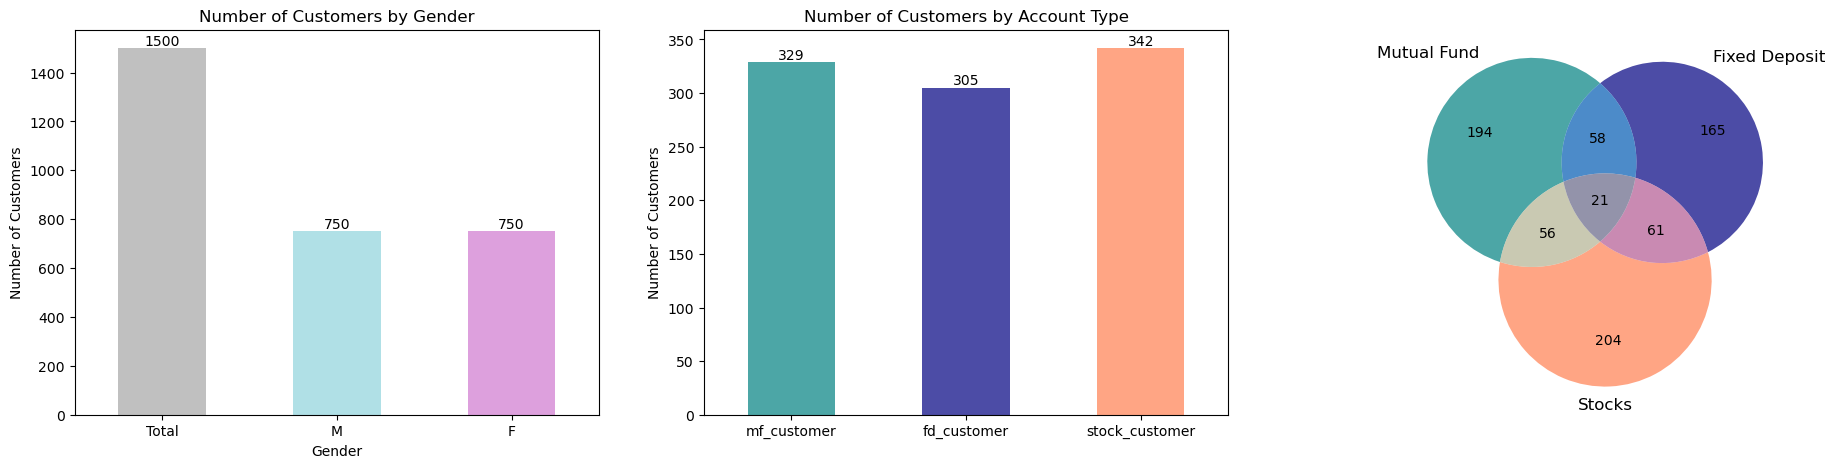

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,10))

ax1 = gender_count.plot(kind='bar', color=['plum', 'powderblue', 'silver'] , figsize=(23,5),rot = 0, ax=ax1)
ax1.set_title('Number of Customers by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Customers')
ax1.bar_label(ax1.containers[0])
ax1.invert_xaxis()

ax2 = summary_of_customers_having_investment_accounts.plot(kind="bar", title="Number of Customers by Account Type",color=['teal', 'navy', 'coral'], figsize=(23,5),rot= 0,ax=ax2,alpha = 0.7)
ax2.set_ylabel('Number of Customers')
ax2.bar_label(ax2.containers[0])


vd = venn.venn3([set1, set2, set3], set_labels=['Mutual Fund', 'Fixed Deposit', 'Stocks'],set_colors=('teal', 'navy', 'coral'),alpha = 0.7, ax=ax3)
plt.tight_layout
plt.show()

# 1. Popular Investments

## Most people preferred Stocks as investment.

### Top 10 performing investments

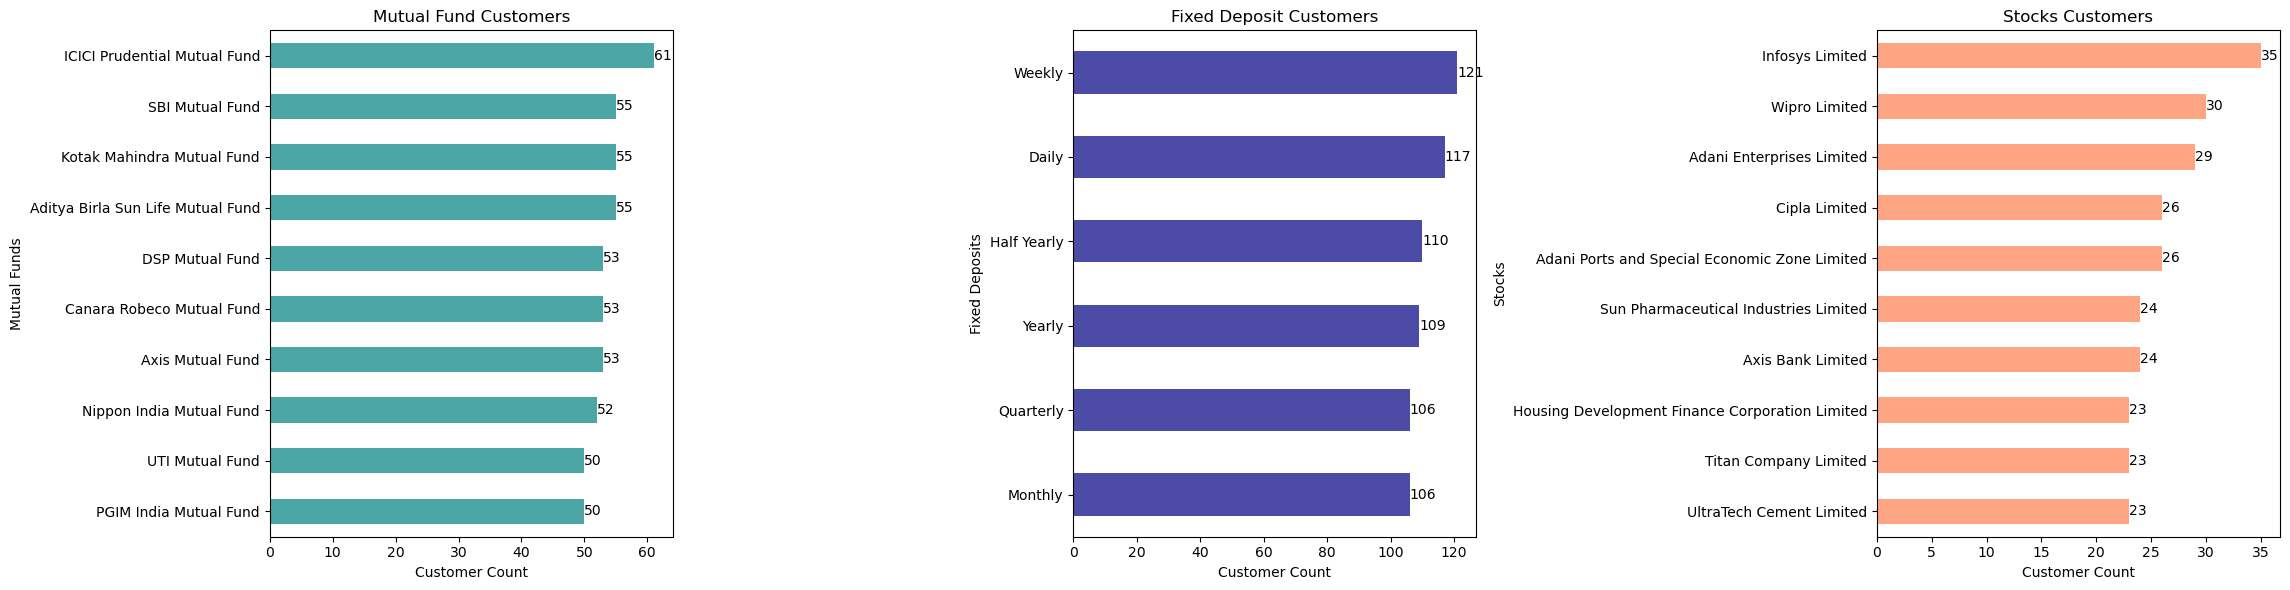

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

MF_investment_top_10.plot.barh(color = "teal", alpha = 0.7 ,ax=axs[0], figsize=(23,6))
FD_investment_top_10.plot.barh(color = "navy", alpha = 0.7,ax=axs[1], figsize=(23,6))
stocks_investment_top_10.plot.barh(color = "coral", alpha = 0.7,ax=axs[2], figsize=(23,6))

#Set the titles
axs[0].set_title('Mutual Fund Customers')
axs[1].set_title('Fixed Deposit Customers')
axs[2].set_title('Stocks Customers')

# Set the x-axis and y-axis labels
axs[0].set_xlabel('Customer Count')
axs[0].set_ylabel('Mutual Funds')
axs[0].bar_label(axs[0].containers[0])


axs[1].set_xlabel('Customer Count')
axs[1].set_ylabel('Fixed Deposits')
axs[1].bar_label(axs[1].containers[0])


axs[2].set_xlabel('Customer Count')
axs[2].set_ylabel('Stocks')
axs[2].bar_label(axs[2].containers[0])


plt.tight_layout()
plt.show()

In [48]:
# fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# stocks_investment_top_10.plot.barh(ax=axs[2])
# FD_investment_top_10.plot.barh(ax=axs[1])
# MF_investment_top_10.plot.barh(ax=axs[0])

# #Set the titles
# axs[0].set_title('Mutual Fund Customers')
# axs[1].set_title('Fixed Deposit Customers')
# axs[2].set_title('Stocks Customers')

# # Set the x-axis and y-axis labels
# axs[0].set_xlabel('Customer Count')
# axs[0].set_ylabel('Mutual Funds')
# axs[1].set_xlabel('Customer Count')
# axs[1].set_ylabel('Fixed Deposits')
# axs[2].set_xlabel('Customer Count')
# axs[2].set_ylabel('Stocks')

# plt.tight_layout()
# plt.show()

# 2. Investments Performace

In [49]:
# ---Formula used to calculate Final Value of investment --- #
# FV = P * (1 + r) ^ t
# r is RETURNS column

In [50]:
TPI_MF = customers_investment_accounts_in_MF[["CUSTOMERID","age","GENDER", "FUNDNAME","INVESTMENTSTATUS","FUNDMANAGER","INVESTMENTDATE","INVESTMENTAMOUNT","RETURNS","cust_account_balance","mf_investment_start_date","mf_investment_days","mf_tenure"]]
TPI_MF['mf_final_value'] = TPI_MF["INVESTMENTAMOUNT"] * (1+ TPI_MF['RETURNS']/100) ** TPI_MF["mf_tenure"]

TPI_MF["mf_profit_per_day"] = (TPI_MF["mf_final_value"]-TPI_MF["INVESTMENTAMOUNT"]) / TPI_MF["mf_investment_days"]
TPI_MF = TPI_MF.sort_values(by = ["FUNDNAME","mf_profit_per_day"],ascending = False).drop_duplicates()
pd.options.display.float_format = '{:.2f}'.format



# TPI_MF

C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\2466141783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_MF['mf_final_value'] = TPI_MF["INVESTMENTAMOUNT"] * (1+ TPI_MF['RETURNS']/100) ** TPI_MF["mf_tenure"]
C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\2466141783.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_MF["mf_profit_per_day"] = (TPI_MF["mf_final_value"]-TPI_MF["INVESTMENTAMOUNT"]) / TPI_MF["mf_investment_days"]


In [51]:
TPI_MF_summary = TPI_MF.groupby('FUNDNAME').agg({'mf_profit_per_day': ['mean', 'min', 'max']})
TPI_MF_summary = TPI_MF_summary.round(decimals=2)

In [52]:
# IMP Data
TPI_MF_summary_all_mf = TPI_MF_summary.style.background_gradient(cmap='ocean_r')

In [53]:
TPI_MF_summary = TPI_MF_summary.sort_values(by=('mf_profit_per_day', 'mean'), ascending=False)

In [54]:
TPI_MF_top_10 = TPI_MF_summary.head(10)
TPI_MF_top_10 = TPI_MF_top_10.style.background_gradient(cmap='BuGn')


# TPI_MF_top_10

In [55]:
TPI_MF_bottom_10 = TPI_MF_summary.tail(10)
TPI_MF_bottom_10 = TPI_MF_bottom_10[::-1]
TPI_MF_bottom_10 = TPI_MF_bottom_10.style.background_gradient(cmap='OrRd_r')


# TPI_MF_bottom_10

### Top and Bottom Mutual Funds

In [56]:
TPI_MF_top_10_html = TPI_MF_top_10.to_html()
TPI_MF_bottom_10_html = TPI_MF_bottom_10.to_html()

# display the styled DataFrames in one row and two columns
HTML(f'<table><tr><td>{TPI_MF_top_10_html}</td><td>{TPI_MF_bottom_10_html}</td></tr></table>')



In [57]:
TPI_FD = customers_investment_accounts_in_FD[["CUSTOMERID", "INTERESTPAYMENTFREQUENCY","INVESTMENTSTATUS","PRINCIPALAMOUNT","MATURITYAMOUNT","RETURNS","cust_account_balance","fd_investment_start_date","fd_investment_days","fd_tenure"]]

# print(len(TPI_FD))

TPI_FD['fd_final_value'] = TPI_FD['PRINCIPALAMOUNT'] * (1 + TPI_FD['RETURNS']/100) ** TPI_FD['fd_tenure']
TPI_FD["fd_investment_days"] = TPI_FD["fd_investment_days"].astype('float')
# TPI_FD['FD_final_value'] = TPI_FD['FD_final_value'].apply(lambda x: int(float(x)))
# TPI_FD["initial_value"] = TPI_FD["PRINCIPALAMOUNT"]
# TPI_FD["final_value"] = TPI_FD["initial_value"] * (1 + (TPI_FD["RETURNS"]/100))
# TPI_FD['final_value'] = TPI_FD['final_value'].apply(lambda x: int(float(x)))
# TPI_FD["profit"] = (TPI_FD["final_value"] - TPI_FD["initial_value"])*100/ TPI_FD["initial_value"]
TPI_FD["fd_profit_per_day"] = (TPI_FD["fd_final_value"] - TPI_FD['PRINCIPALAMOUNT'])/ TPI_FD["fd_investment_days"]
TPI_FD = TPI_FD.sort_values(by = ["INTERESTPAYMENTFREQUENCY","fd_profit_per_day"],ascending = False).drop_duplicates()
pd.options.display.float_format = '{:.2f}'.format


# TPI_FD

C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\3266008243.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_FD['fd_final_value'] = TPI_FD['PRINCIPALAMOUNT'] * (1 + TPI_FD['RETURNS']/100) ** TPI_FD['fd_tenure']
C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\3266008243.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_FD["fd_investment_days"] = TPI_FD["fd_investment_days"].astype('float')
C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\3266008243.py:12: SettingWithCopyWarning: 
A value is 

In [58]:
TPI_FD_summary = TPI_FD.groupby('INTERESTPAYMENTFREQUENCY').agg({'fd_profit_per_day': ['mean', 'min', 'max']}) 

# IMP Data
TPI_FD_summary_all_fd = TPI_FD_summary.style.background_gradient(cmap='ocean_r')

In [59]:
TPI_FD_summary = TPI_FD_summary.sort_values(by=('fd_profit_per_day', 'mean'), ascending=False)
TPI_FD_top_10 = TPI_FD_summary.head(10)
TPI_FD_top_10 = TPI_FD_top_10.style.background_gradient(cmap='BuGn')


# TPI_FD_top_10

In [60]:
TPI_FD_bottom_10 = TPI_FD_summary.tail(10)
TPI_FD_bottom_10 = TPI_FD_bottom_10[::-1]
TPI_FD_bottom_10 = TPI_FD_bottom_10.style.background_gradient(cmap='OrRd_r')


# TPI_FD_bottom_10

### Top and Bottom Fixed Deposits

In [61]:
TPI_FD_top_10_html = TPI_FD_top_10.to_html()
TPI_FD_bottom_10_html = TPI_FD_bottom_10.to_html()

# display the styled DataFrames in one row and two columns
HTML(f'<table><tr><td>{TPI_FD_top_10_html}</td><td>{TPI_FD_bottom_10_html}</td></tr></table>')



In [62]:
TPI_stocks = customers_investment_accounts_in_stocks[["CUSTOMERID","STOCKID","STOCKNAME","STOCKSYMBOL","STOCKEXCHANGE","PURCHASEPRICE","PURCHASEDATE","QUANTITY","RETURNS","cust_account_balance","stock_investment_start_date","stock_investment_days","stock_tenure"]]
TPI_stocks['stock_initial_value'] = TPI_stocks["PURCHASEPRICE"]*TPI_stocks["QUANTITY"]
TPI_stocks['stock_final_value'] = TPI_stocks['stock_initial_value'] * (1+ TPI_stocks['RETURNS']/100) ** TPI_stocks["stock_tenure"]
TPI_stocks["stock_profit_per_day"] = (TPI_stocks["stock_final_value"] - TPI_stocks['stock_initial_value'] )/ TPI_stocks["stock_investment_days"]
TPI_stocks = TPI_stocks.sort_values(by = ["QUANTITY","stock_profit_per_day"],ascending = False).drop_duplicates()


# TPI_stocks

C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\88136542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_stocks['stock_initial_value'] = TPI_stocks["PURCHASEPRICE"]*TPI_stocks["QUANTITY"]
C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\88136542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TPI_stocks['stock_final_value'] = TPI_stocks['stock_initial_value'] * (1+ TPI_stocks['RETURNS']/100) ** TPI_stocks["stock_tenure"]
C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\88136542.py:4: Setting

In [63]:
TPI_stock_summary =TPI_stocks.groupby('STOCKNAME').agg({'stock_profit_per_day': ['mean', 'min', 'max']}) 

In [64]:
# IMP Data
TPI_stock_summary_all_stocks = TPI_stock_summary.style.background_gradient(cmap='ocean_r')

In [65]:
TPI_stock_summary = TPI_stock_summary.sort_values(by=('stock_profit_per_day', 'mean'), ascending=False)

In [66]:
TPI_stock_top_10 = TPI_stock_summary.head(10)
TPI_stock_top_10 = TPI_stock_top_10.style.background_gradient(cmap='BuGn')


# TPI_stock_top_10

In [67]:
TPI_stock_bottom_10 = TPI_stock_summary.tail(10)
TPI_stock_bottom_10 = TPI_stock_bottom_10[::-1]
TPI_stock_bottom_10 = TPI_stock_bottom_10.style.background_gradient(cmap='OrRd_r')


# TPI_stock_bottom_10

### Top and Bottom Stocks

In [68]:
TPI_stock_top_10_html = TPI_stock_top_10.to_html()
TPI_stock_bottom_10_html = TPI_stock_bottom_10.to_html()

# display the styled DataFrames in one row and two columns
HTML(f'<table><tr><td>{TPI_stock_top_10_html}</td><td>{TPI_stock_bottom_10_html}</td></tr></table>')



# 3. Identifying High-Net-Worth Investors

In [69]:
customers_investment_accounts = pd.merge(customers, investment_accounts, how ="outer",indicator="customers_investment_accounts")
customers_investment_accounts['customer_have_investment_account'] = customers_investment_accounts['customers_investment_accounts'].apply(lambda x: 'Yes' if x == 'both' else 'No')
customers_investment_accounts = customers_investment_accounts[customers_investment_accounts["customer_have_investment_account"] == "No"]
customers_investment_accounts = customers_investment_accounts[["CUSTOMERID","FIRSTNAME","LASTNAME","GENDER","age"]].reset_index()


# customers_investment_accounts

In [70]:
customers_accountbalancesum = customers_accounts[["CUSTOMERID","FIRSTNAME","LASTNAME","age","cust_account_balance"]]
customers_investment_accounts_account_balance = pd.merge(customers_investment_accounts, customers_accountbalancesum, how ="inner")

In [71]:



# plt.ticklabel_format(style='plain')

# plt.scatter(customers_investment_accounts_account_balance["age"], customers_investment_accounts_account_balance["cust_account_balance"])
# plt.axvspan(40, 80, ymin = 0.64, ymax = 0.98, ec ='darkgreen', fill=False, label = "rich_people", linewidth=2)
# # plt.axvspan(15, 25, ymin = 0.01, ymax = 0.25, ec ='red', fill=False, label = "education_loan", linewidth=2)
# plt.legend(loc="upper right")



In [72]:
customers_investment_accounts_account_balance = customers_investment_accounts_account_balance[(customers_investment_accounts_account_balance["age"] >= 40) & (customers_investment_accounts_account_balance["age"] <= 80)]
customers_investment_accounts_account_balance = customers_investment_accounts_account_balance[(customers_investment_accounts_account_balance["cust_account_balance"] >= 15000000)]
customers_investment_accounts_account_balance = customers_investment_accounts_account_balance.drop_duplicates().reset_index(drop=True)
customers_investment_accounts_account_balance = customers_investment_accounts_account_balance.sort_values(["cust_account_balance","CUSTOMERID"],ascending = [True,True])


# customers_investment_accounts_account_balance

In [73]:
TPI_MF.sort_values("CUSTOMERID", ascending = True)
mf_final_investment_customers = TPI_MF.groupby(by=['CUSTOMERID']).agg({'mf_final_value': 'sum'}).rename(columns={'mf_final_value': 'mf_final_investment_amount'})


# mf_final_investment_customers

In [74]:
TPI_FD.reset_index(drop=True)
TPI_FD.sort_values(["CUSTOMERID"],ascending = [False])
fd_final_investment_customers = TPI_FD.groupby(by=['CUSTOMERID']).agg({'fd_final_value': 'sum'}).rename(columns={'fd_final_value': 'fd_final_investment_amount'})


# fd_final_investment_customers

In [75]:
TPI_stocks.reset_index(drop=True)
TPI_stocks.sort_values(["CUSTOMERID"],ascending = [False])
stock_final_investment_customers = TPI_stocks.groupby(by=['CUSTOMERID']).agg({'stock_final_value': 'sum'}).rename(columns={'stock_final_value': 'stock_final_investment_amount'})


# stock_final_investment_customers

In [76]:
customers_account_balance
customer_details = pd.merge(customers, accounts, how ="inner")
customer_details = customer_details[["CUSTOMERID","GENDER","age"]].drop_duplicates()
customer_details = pd.merge(customer_details, customers_account_balance, how ="inner", on = "CUSTOMERID")


# customer_details

In [77]:
collating_customer_details_investments = pd.merge(customer_details, mf_final_investment_customers, how ="left", on = "CUSTOMERID")
collating_customer_details_investments = pd.merge(collating_customer_details_investments, fd_final_investment_customers, how ="left", on = "CUSTOMERID")
collating_customer_details_investments = pd.merge(collating_customer_details_investments, stock_final_investment_customers, how ="left", on = "CUSTOMERID")
collating_customer_details_investments = collating_customer_details_investments.fillna(0)


# collating_customer_details_investments

In [78]:
collating_customer_details_investments["account_balance_considering_profits"] = collating_customer_details_investments["mf_final_investment_amount"] + collating_customer_details_investments["fd_final_investment_amount"]+collating_customer_details_investments["stock_final_investment_amount"]
collating_customer_details_investments["account_balance_considering_profits_and_initial_acnt_bal"] = collating_customer_details_investments["cust_account_balance"] + collating_customer_details_investments["mf_final_investment_amount"] + collating_customer_details_investments["fd_final_investment_amount"]+collating_customer_details_investments["stock_final_investment_amount"]


# collating_customer_details_investments

In [79]:
rich_customers_in_investment = collating_customer_details_investments.sort_values(["account_balance_considering_profits"],ascending = [False]).reset_index(drop = True)
top_rich_customers = rich_customers_in_investment.head(10)


# display(top_rich_customers)

In [80]:
top_rich_customers = top_rich_customers.head(5)
top_rich_customers_list = top_rich_customers['CUSTOMERID'].unique().tolist()


# top_rich_customers

In [81]:


# plt.ticklabel_format(style='plain')
# plt.scatter(collating_customer_details_investments["age"], collating_customer_details_investments["account_balance_considering_profits"])
# plt.axvspan(20, 80, ymin = 0.39, ymax = 0.98, ec ='darkgreen', fill=False, label = "rich_people", linewidth=2)
# plt.legend(loc="upper right")



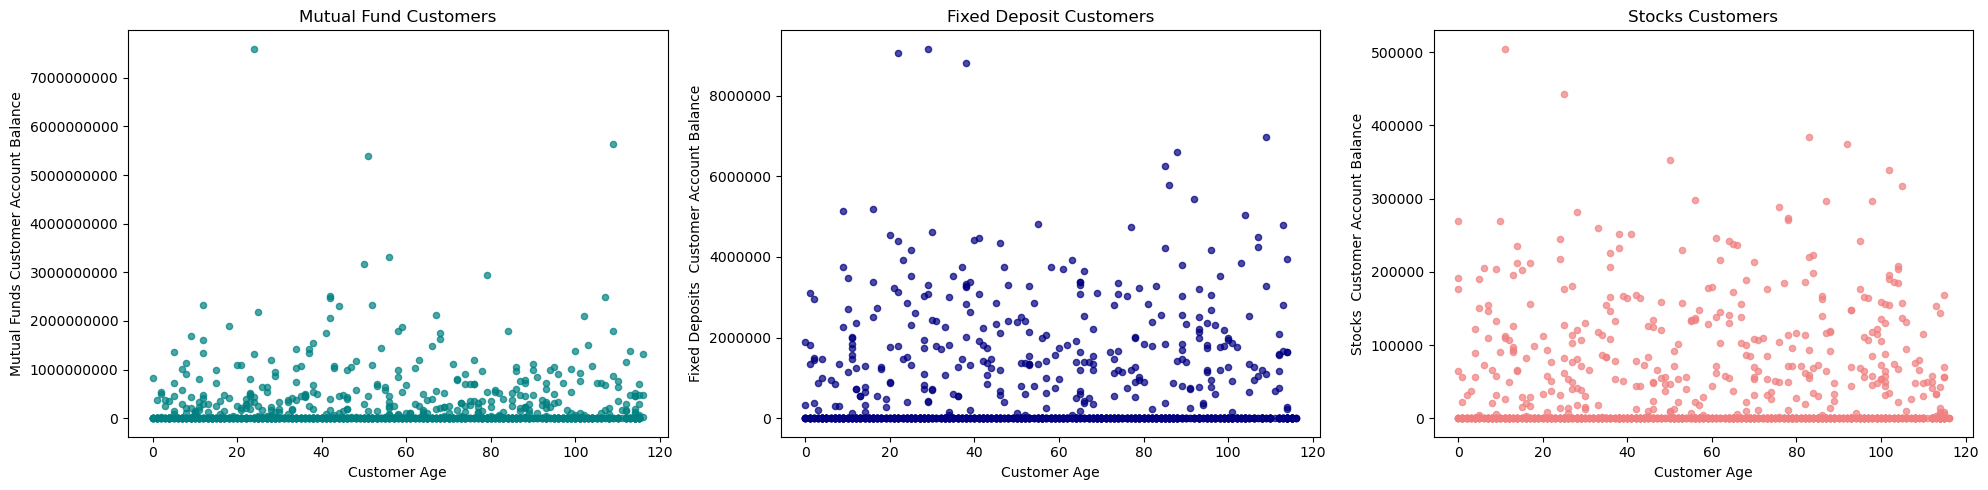

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

collating_customer_details_investments.plot(kind='scatter',x='age',y='mf_final_investment_amount',ax=axs[0],color = "teal", alpha = 0.7);axs[0].ticklabel_format(style='plain',axis = 'y')
collating_customer_details_investments.plot(kind='scatter',x='age',y='fd_final_investment_amount',ax=axs[1],color = "navy", alpha = 0.7);axs[1].ticklabel_format(style='plain')
collating_customer_details_investments.plot(kind='scatter',x='age',y='stock_final_investment_amount',ax=axs[2],color = "lightcoral", alpha = 0.7);axs[2].ticklabel_format(style='plain')

#Set the titles
axs[0].set_title('Mutual Fund Customers')
axs[1].set_title('Fixed Deposit Customers')
axs[2].set_title('Stocks Customers')

# Set the x-axis and y-axis labels
axs[0].set_xlabel('Customer Age')
axs[0].set_ylabel('Mutual Funds Customer Account Balance')
axs[1].set_xlabel('Customer Age')
axs[1].set_ylabel('Fixed Deposits  Customer Account Balance')
axs[2].set_xlabel('Customer Age')
axs[2].set_ylabel('Stocks  Customer Account Balance')

plt.tight_layout()
plt.show()

### High Net Worth Investors List

In [83]:
top_rich_customers

,CUSTOMERID,GENDER,age,cust_account_balance,mf_final_investment_amount,fd_final_investment_amount,stock_final_investment_amount,account_balance_considering_profits,account_balance_considering_profits_and_initial_acnt_bal
0,2338,F,24,7857953,7594056141.27,0.00,0.00,7594056141.27,7601914094.27
1,2129,F,109,5445340,5633210188.42,0.00,0.00,5633210188.42,5638655528.42
2,1559,M,51,9953933,5389537758.66,0.00,0.00,5389537758.66,5399491691.66
3,1056,F,56,10559163,3315151890.19,0.00,0.00,3315151890.19,3325711053.19
4,2377,F,50,1785838,3168222166.08,0.00,0.00,3168222166.08,3170008004.08


# 4. Historical Returns

In [84]:
# As we can see top customers are the ones who invested in Mutual Funds, therefore considering MF data.


In [85]:
rich_customers = TPI_MF[TPI_MF['CUSTOMERID'].isin(top_rich_customers_list)].reset_index(drop = True)
# rich_customers = rich_customers[["CUSTOMERID","FUNDNAME","INVESTMENTAMOUNT","mf_final_value"]]
# rich_customers = rich_customers[rich_customers["CUSTOMERID"] == int("1640")]
rich_customers.loc[:, "fv_6_month_ago"] = "NA"
rich_customers.loc[:, "fv_7_month_ago"] = "NA"
rich_customers.loc[:, "fv_8_month_ago"] = "NA"
rich_customers.loc[:, "fv_9_month_ago"] = "NA"
rich_customers.loc[:, "fv_10_month_ago"] = "NA"
rich_customers.loc[:, "fv_11_month_ago"] = "NA"


# rich_customers

In [86]:
for i in range(len(rich_customers)):
    count = 6
    k = 6
    for j in range(6,12):
        tenure = k/12
        column_string = "fv_" + str(count) + "_month_ago"
        count = count + 1
        k = k - 1
        rich_customers[column_string].iloc[i] = rich_customers["INVESTMENTAMOUNT"].iloc[i] *  (1+ rich_customers['RETURNS'].iloc[i]/100) ** (rich_customers["mf_tenure"].iloc[i] - tenure)

C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\3429247233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rich_customers[column_string].iloc[i] = rich_customers["INVESTMENTAMOUNT"].iloc[i] *  (1+ rich_customers['RETURNS'].iloc[i]/100) ** (rich_customers["mf_tenure"].iloc[i] - tenure)
C:\Users\pbone\AppData\Local\Temp\ipykernel_11188\3429247233.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rich_customers[column_string].iloc[i] = rich_customers["INVESTMENTAMOUNT"].iloc[i] *  (1+ rich_customers['RETURNS'].iloc[i]/100) ** (rich_customers["mf_tenure"].iloc[i] - tenure)
C:\Users\pbone\AppData\Local\Temp\ipykerne

Total returns for the past six months on a monthly basis for the top 5 customers with the highest portfolios.


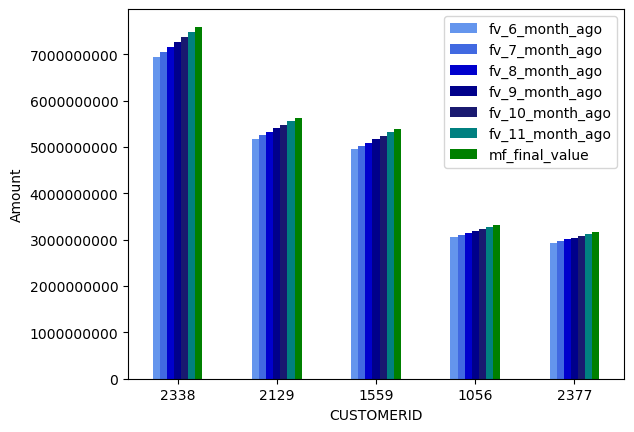

In [87]:
print("Total returns for the past six months on a monthly basis for the top 5 customers with the highest portfolios.")
rich_customers = rich_customers.groupby('CUSTOMERID')[['fv_6_month_ago', 'fv_7_month_ago', 'fv_8_month_ago', 'fv_9_month_ago','fv_10_month_ago','fv_11_month_ago','mf_final_value']].sum().reset_index()
rich_customers = rich_customers.sort_values(["mf_final_value"],ascending = [False])
rich_customers.plot(x='CUSTOMERID', y=['fv_6_month_ago', 'fv_7_month_ago', 'fv_8_month_ago', 'fv_9_month_ago','fv_10_month_ago','fv_11_month_ago','mf_final_value'], kind='bar',rot = 0,color = ["cornflowerblue","royalblue","mediumblue","darkblue","midnightblue","teal","green"])
# ax.yaxis.set_major_formatter(formatter)
plt.ticklabel_format (axis='y', style='plain')
plt.ylabel("Amount");

# 5. Tax Calculation on Investments

### Tax on Mutual Fund

In [88]:
#-----------Customize tax data by passing customer in customer_list----------------#

# customer_list = ["1640","2377"]
customer_list = None


In [89]:
tax_on_MF = TPI_MF.reset_index(drop = True)
tax_on_MF["gains"] = tax_on_MF["mf_final_value"] - tax_on_MF["INVESTMENTAMOUNT"]
tax_on_MF['tax_rdm_within_1_year'] = tax_on_MF['gains'] * 0.15
tax_on_MF['tax_rdm_after_1_year'] = tax_on_MF.apply(lambda x: (x['gains']- 100000) * 0.1 if (x['gains']) >= 100000 else 0, axis=1)
tax_on_MF["CUSTOMERID"] = tax_on_MF["CUSTOMERID"].astype(str)


# print(len(tax_on_MF))

In [90]:
if customer_list is not None:
    tax_on_MF_customized = tax_on_MF[tax_on_MF["CUSTOMERID"].isin(customer_list)]
    if len(tax_on_MF_customized)>0 :
        display(tax_on_MF_customized)
    else :
        display(tax_on_MF_customized)
else:
    tax_on_MF_customized = tax_on_MF
    display(tax_on_MF_customized)

,CUSTOMERID,age,GENDER,FUNDNAME,INVESTMENTSTATUS,FUNDMANAGER,INVESTMENTDATE,INVESTMENTAMOUNT,RETURNS,cust_account_balance,mf_investment_start_date,mf_investment_days,mf_tenure,mf_final_value,mf_profit_per_day,gains,tax_rdm_within_1_year,tax_rdm_after_1_year
0,1640,12,F,UTI Mutual Fund,Closed,Ankit Agarwal,2006-02-26 00:41:06,88350565,16.21,17406092,2006-02-26 00:41:06,6489,17.78,1277212586.15,183211.90,1188862021.15,178329303.17,118876202.11
1,2377,50,F,UTI Mutual Fund,Active,Ankit Agarwal,2007-04-23 17:46:22,60654587,17.11,1785838,2007-04-23 17:46:22,6068,16.62,837989351.37,128103.95,777334764.37,116600214.66,77723476.44
2,2330,25,M,UTI Mutual Fund,Active,Ankit Agarwal,2005-04-08 08:24:37,27525475,19.67,4019786,2005-04-08 08:24:37,6813,18.67,786138374.49,111347.85,758612899.49,113791934.92,75851289.95
3,1646,37,F,UTI Mutual Fund,Closed,Ankit Agarwal,2004-10-13 14:05:10,67423157,13.59,7044434,2004-10-13 14:05:10,6990,19.15,773841593.21,101061.29,706418436.21,105962765.43,70631843.62
4,1412,100,M,UTI Mutual Fund,Active,Ankit Agarwal,2006-04-16 14:55:54,95301418,11.91,6998457,2006-04-16 14:55:54,6440,17.64,694011475.51,92967.40,598710057.51,89806508.63,59861005.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,1174,42,F,Aditya Birla Sun Life Mutual Fund,Closed,Bhupesh Bameta,2016-03-02 03:44:04,9885288,10.34,2764295,2016-03-02 03:44:04,2832,7.76,21214533.29,4000.44,11329245.29,1699386.79,1122924.53
833,1972,88,M,Aditya Birla Sun Life Mutual Fund,Closed,Bhupesh Bameta,2008-06-28 00:41:51,7897604,8.71,6477833,2008-06-28 00:41:51,5636,15.44,28682644.47,3687.91,20785040.47,3117756.07,2068504.05
834,1395,88,M,Aditya Birla Sun Life Mutual Fund,Closed,Bhupesh Bameta,2015-03-25 10:42:04,5309157,11.30,5132415,2015-03-25 10:42:04,3175,8.70,13474827.25,2571.86,8165670.25,1224850.54,806567.03
835,1217,68,F,Aditya Birla Sun Life Mutual Fund,Active,Bhupesh Bameta,2008-02-09 02:45:44,4151126,7.44,10696013,2008-02-09 02:45:44,5776,15.83,12924722.47,1518.97,8773596.47,1316039.47,867359.65


### Tax on Fixed Deposit

In [91]:
tax_on_FD = TPI_FD.reset_index(drop = True)
tax_on_FD["gains"] = tax_on_FD["fd_final_value"] - tax_on_FD["PRINCIPALAMOUNT"]
tax_on_FD['tax_rdm_within_1_year'] = tax_on_FD['gains'] * 0.15
tax_on_FD['tax_rdm_after_1_year'] = tax_on_FD.apply(lambda x: (x['gains']- 100000) * 0.1 if (x['gains']) >= 100000 else 0, axis=1)


# print(len(tax_on_FD))

In [92]:
if customer_list is not None:
    tax_on_FD_customized = tax_on_FD[tax_on_FD["CUSTOMERID"].isin(customer_list)]
    if len(tax_on_FD_customized) > 0 :
        display("tax_on_FD_customized")
    else :
        display("No Fixed Deposit Customer")
else :
    tax_on_FD_customized = tax_on_FD
    display(tax_on_FD_customized)

,CUSTOMERID,INTERESTPAYMENTFREQUENCY,INVESTMENTSTATUS,PRINCIPALAMOUNT,MATURITYAMOUNT,RETURNS,cust_account_balance,fd_investment_start_date,fd_investment_days,fd_tenure,fd_final_value,fd_profit_per_day,gains,tax_rdm_within_1_year,tax_rdm_after_1_year
0,2258,Yearly,Closed,878409,7052177,17.58,6134661,2019-08-15 20:24:15,1571.00,4.30,1763691.22,563.52,885282.22,132792.33,78528.22
1,1185,Yearly,Closed,809528,6035713,17.87,5519554,2019-11-26 17:58:04,1468.00,4.02,1568313.17,516.88,758785.17,113817.78,65878.52
2,2014,Yearly,Closed,693991,1668505,18.84,10346525,2019-03-23 12:22:23,1716.00,4.70,1562617.70,506.19,868626.70,130294.00,76862.67
3,1459,Yearly,Closed,853495,2920485,19.33,4662071,2021-10-07 21:29:12,786.00,2.16,1249336.63,503.62,395841.63,59376.25,29584.16
4,2074,Yearly,Closed,814539,4115228,18.82,5337974,2021-01-17 02:03:32,1050.00,2.88,1338158.21,498.68,523619.21,78542.88,42361.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,2024,Daily,Closed,53690,4195982,6.20,3727718,2018-10-12 16:26:43,1878.00,5.15,73168.19,10.37,19478.19,2921.73,0.00
813,2273,Daily,Closed,24874,3165715,12.39,1767044,2020-02-21 11:39:35,1381.00,3.78,38701.66,10.01,13827.66,2074.15,0.00
814,1029,Daily,Active,43784,8176010,6.10,2246532,2022-06-20 11:44:44,531.00,1.46,47725.72,7.42,3941.72,591.26,0.00
815,1701,Daily,Active,14407,6855853,13.97,6958611,2021-02-18 10:36:28,1018.00,2.79,20750.60,6.23,6343.60,951.54,0.00


### Tax on Stocks

In [93]:
tax_on_stocks = TPI_stocks.reset_index(drop = True)
tax_on_stocks["gains"] = tax_on_stocks["stock_final_value"] - tax_on_stocks["stock_initial_value"]
tax_on_stocks['tax_on_stocks'] = tax_on_stocks['gains'] * 0.10


# print(len(tax_on_stocks))

In [94]:
if customer_list is not None:
    tax_on_stocks_customized = tax_on_stocks[tax_on_stocks["CUSTOMERID"].isin(customer_list)]
    if len(tax_on_stocks_customized)>0 :
        display(tax_on_stocks_customized)
    else :
        display("No Stock Customers")
else :
    tax_on_stocks_customized = tax_on_stocks
    display(tax_on_stocks_customized)

,CUSTOMERID,STOCKID,STOCKNAME,STOCKSYMBOL,STOCKEXCHANGE,PURCHASEPRICE,PURCHASEDATE,QUANTITY,RETURNS,cust_account_balance,stock_investment_start_date,stock_investment_days,stock_tenure,stock_initial_value,stock_final_value,stock_profit_per_day,gains,tax_on_stocks
0,1221,2665,Cipla Limited,CIPLA,BSE,694,2020-08-27 05:28:44,100,14.89,4692240,2020-08-27 05:28:44,1193,3.27,69400,109268.93,33.42,39868.93,3986.89
1,1160,2902,Hindustan Petroleum Corporation Limited,HINDPETRO,NSE,404,2020-06-22 04:07:19,100,18.94,2264515,2020-06-22 04:07:19,1259,3.45,40400,73511.32,26.30,33111.32,3311.13
2,2320,1318,Bajaj Finance Limited,BAJFINANCE,NSE,928,2020-03-16 16:12:34,100,7.83,613216,2020-03-16 16:12:34,1357,3.72,92800,122824.38,22.13,30024.38,3002.44
3,2339,1071,Adani Green Energy Limited,ADANIGREEN,NSE,815,2019-09-04 09:37:33,100,8.46,7245686,2019-09-04 09:37:33,1551,4.25,81500,115099.67,21.66,33599.67,3359.97
4,1727,2205,Hindustan Unilever Limited,HINDUNILVR,BSE,322,2022-12-31 03:55:39,100,14.57,9284870,2022-12-31 03:55:39,337,0.93,32200,36518.16,12.81,4318.16,431.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,1046,3988,IndusInd Bank Limited,INDUSINDBK,NSE,390,2023-08-27 22:41:30,1,15.11,3628489,2023-08-27 22:41:30,97,0.27,390,405.00,0.15,15.00,1.50
916,1802,1003,Bajaj Auto Limited,BAJAJ-AUTO,BSE,419,2020-09-13 09:53:08,1,6.40,16766955,2020-09-13 09:53:08,1176,3.22,419,511.74,0.08,92.74,9.27
917,1085,3647,Cipla Limited,CIPLA,BSE,152,2020-11-30 08:36:48,1,15.65,2258879,2020-11-30 08:36:48,1098,3.01,152,235.44,0.08,83.44,8.34
918,2226,1797,State Bank of India,SBIN,NSE,332,2021-04-29 09:44:18,1,7.41,14890936,2021-04-29 09:44:18,948,2.60,332,399.77,0.07,67.77,6.78


# 6. Analysis of Profitable and Non Profitable Investments

## Mutual Fund Investments

In [95]:
TPI_MF_summary_all_mf

In [96]:
display()

## Stocks Investments

In [97]:
TPI_stock_summary_all_stocks

In [98]:
display()

## Fixed Deposit Investments

In [99]:
TPI_FD_summary_all_fd

In [100]:
display()

# 7. Customers With No Investment Accounts

In [101]:
customers_account_balance = customers_accounts.groupby(by=['CUSTOMERID',"age"]).agg({'ACCOUNTBALANCE': 'sum'}).rename(columns={'ACCOUNTBALANCE': 'cust_account_balance'}).reset_index()


# customers_account_balance

In [102]:
investment_accounts_data = investment_accounts[["CUSTOMERID"]].drop_duplicates()
investment_accounts_data["cust_have_instmt_acc"] = 1
customers_no_investment = pd.merge(customers_account_balance,investment_accounts_data, how = "left", on = "CUSTOMERID")
customers_no_investment = customers_no_investment.fillna(0)


# customers_no_investment

In [103]:
customers_no_investment = customers_no_investment[customers_no_investment["cust_have_instmt_acc"] == 0]


# customers_no_investment

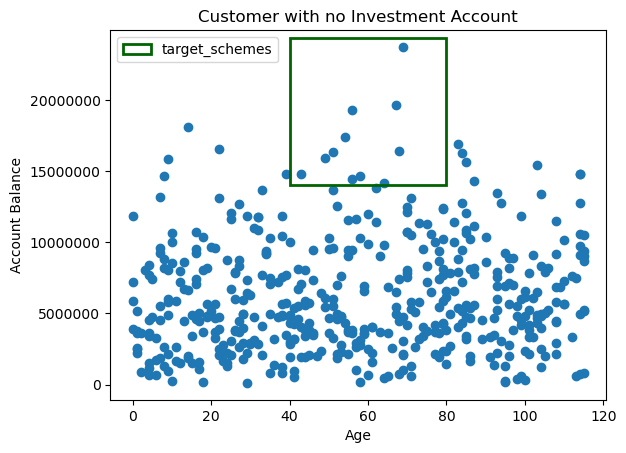

In [104]:
plt.ticklabel_format(style='plain')

plt.scatter(customers_no_investment["age"], customers_no_investment["cust_account_balance"])
plt.axvspan(40, 80, ymin = 0.58, ymax = 0.98, ec ='darkgreen', fill=False, label = "target_schemes", linewidth=2)
plt.legend(loc="upper left")
plt.xlabel("Age")
plt.ylabel("Account Balance")
plt.title("Customer with no Investment Account");

In [105]:
customers_no_investment = customers_no_investment[(customers_no_investment["age"] >= 40) & (customers_no_investment["age"] <= 80)]
customers_no_investment = customers_no_investment[(customers_no_investment["cust_account_balance"] >= 14000000)]
customers_no_investment = customers_no_investment.sort_values(["cust_account_balance","CUSTOMERID"],ascending = [False,True])
customers_no_investment.drop(['cust_have_instmt_acc'], axis=1).reset_index(drop = True)

,CUSTOMERID,age,cust_account_balance
0,1870,69,23713697
1,1656,67,19639999
2,2125,56,19296345
3,1447,54,17387610
4,1067,68,16432929
5,2192,51,16302995
6,1879,49,15935737
7,2224,43,14768789
8,1069,58,14635585
9,2438,56,14420422
